<a href="https://colab.research.google.com/github/BoboSamson/BoboSamson/blob/main/Batch_normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradients: tensor([[ 0.0000e+00, -2.3842e-07,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.1921e-07,  2.3842e-07,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


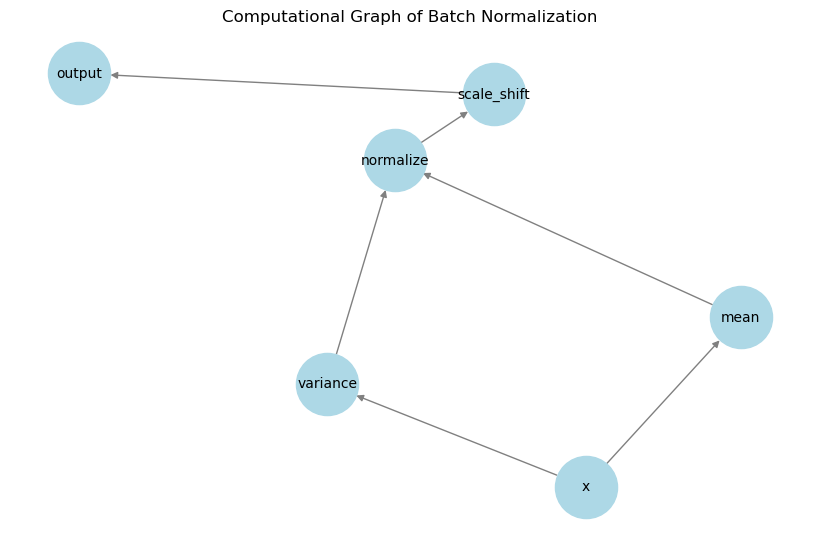

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import networkx as nx

class BatchNorm(nn.Module):
    def __init__(self, num_features, epsilon=1e-5):
        super(BatchNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(num_features))  # Scale parameter
        self.beta = nn.Parameter(torch.zeros(num_features))  # Shift parameter
        self.epsilon = epsilon

    def forward(self, x):
        mu = x.mean(dim=0, keepdim=True)  # Compute mean
        var = x.var(dim=0, unbiased=False, keepdim=True)  # Compute variance
        x_norm = (x - mu) / torch.sqrt(var + self.epsilon)  # Normalize
        out = self.gamma * x_norm + self.beta  # Scale and shift
        return out

def forward_backward_bn(x, dE_dy):
    bn = BatchNorm(x.shape[1])
    x.requires_grad = True
    y = bn(x)
    y.backward(dE_dy)
    return x.grad

def visualize_dag_bn():
    G = nx.DiGraph()
    edges = [("x", "mean"), ("x", "variance"),
             ("mean", "normalize"), ("variance", "normalize"),
             ("normalize", "scale_shift"),
             ("scale_shift", "output")]

    G.add_edges_from(edges)

    plt.figure(figsize=(8, 5))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title("Computational Graph of Batch Normalization")
    plt.show()

# Example usage
x_example = torch.randn(5, 3)  # Batch of 5 samples, 3 features
dE_dy_example = torch.ones_like(x_example)  # Example gradient from upstream

dE_dx = forward_backward_bn(x_example, dE_dy_example)
print(f"Gradients: {dE_dx}")

# Visualize the DAG
visualize_dag_bn()
